Student Name: Abhijit Sinha
Student ID: 18195067

## Task

###### Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.

###### N.B.:

- Limit your code to the aspects explicitly listed. 
- Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
- The required modules have already been imported for you. You should not import any other modules.
- If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later.

### Reflection:

##### With your code (containing any corrections you have made based on your peers’ feedback), do the following:

- For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.

- For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction

In [108]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [109]:
a_x = 0.05
a_y= 10

In [110]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

In [111]:
data.shape

(20, 2)

### Create a class to find PCA using numpy
- Making use of Numpy, creating a Python class to apply the PCA transform to the provided data set. 

Following the steps from the links below: 
    - http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf 
    - https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
    
- Step 1: Get some data
- Step 2: Subtract the mean
- Step 3: Calculate the covariance matrix
- Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
- Step 5: Choosing components and forming a feature vector
- Step 6: Deriving the new data set

In [112]:
class New_PCA:
    """Principal component analysis (PCA)
     
    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space.
    """
    
    def __init__(self,n_components=None):
        self.n_components = n_components
        self.components_ = []
        
    def fit(self, data):
        """Fit the model with provided data"""
        
        # Step 1: Get the data
        self.data = data
       
        # Step 2: Get mean of data and centre around zero mean
        self.mean_data = self.data.mean(axis=0)
        
        # Center data
        self.data_with_zero_mean = self.data - self.mean_data

        # Step 3: Calculate the covariance matrix of the Centred Data
        self.covariance_matrix = np.cov(self.data_with_zero_mean, rowvar=False)
        
        # Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
        eigen_values, eigen_vectors = eig(self.covariance_matrix)    
        
        # Sort the eigen valuess and eigen vectors    
        sort_index = eigen_values.argsort()[::-1]
        sorted_eig_vals = eigen_values[sort_index]
        sorted_eig_vecs = eigen_vectors[:, sort_index]
        
        # n_components will filter the eigen vectors
        self.eigen_vals= sorted_eig_vals[:self.n_components]
        self.eigen_vecs = sorted_eig_vecs[:, :self.n_components]         
        self.components_ = self.eigen_vecs
        
        return self.eigen_vals, self.eigen_vecs
    
    def transform(self, data):
        """Transform the data by calculating the projection""" 
        
        # Step 5: Choosing components and forming a feature vector and applying Projection
        self.projected_data = self.data_with_zero_mean.dot(self.eigen_vecs)
        print(self.projected_data)
        return self.projected_data
    

### Function to check PCA using Scikit Learn modules

In [113]:
def scikitlearn_pca(n):
    """Function that call Scikit learn PCA for dimensionality reduction"""
    
    pca = PCA(n_components=n)  #, whiten=True : scale and center data
    pca.fit(data)
    scikit_projected_data = pca.transform(data)
    scikit_data_reduced = pca.inverse_transform(projected_data)
    return scikit_projected_data, scikit_data_reduced


### Test the code

In [114]:
n = int(input(" Select the n_componenets for PCA : "))
if n == 1 or n == 2:
    pass
else:
    raise Exception("Please input n_componenets as 1 or 2")
    
    
print("\n********* PCA Implemented for {} component ***********".format(n))
derived_pca = New_PCA(n)
derived_pca.fit(data)
projected_data = derived_pca.transform(data)

 Select the n_componenets for PCA : 2

********* PCA Implemented for 2 component ***********
[[ 4.27143727e+01 -4.65201981e-01]
 [ 3.66262062e+01 -6.47874212e-02]
 [ 3.55674287e+01 -7.75733438e-01]
 [ 2.80732173e+01 -4.45543309e-03]
 [ 2.05435931e+01  6.94225840e-01]
 [ 1.60390045e+01  7.90852617e-01]
 [ 1.00307290e+01  1.18554009e+00]
 [ 9.28740626e+00  3.04551850e-01]
 [ 6.33013254e+00 -1.71038665e-01]
 [ 4.22093276e+00 -3.45729654e-01]
 [-5.10778492e+00  7.87785543e-01]
 [-2.19676196e+00 -9.14826556e-01]
 [-8.29180619e+00 -6.81156570e-01]
 [-1.86177981e+01  6.80889187e-01]
 [-2.10802585e+01  2.73276932e-01]
 [-2.16835808e+01 -2.72927363e-01]
 [-2.34258290e+01 -1.00193096e+00]
 [-3.59146228e+01  6.09464131e-01]
 [-3.18964313e+01 -8.34590542e-01]
 [-4.12181494e+01  2.05792391e-01]]


In [115]:
print("\n********** Scikitlean PCA  for {} component **********".format(n))
scikit_projected_data, scikit_pca_result = scikitlearn_pca(n)
print(scikit_projected_data)


********** Scikitlean PCA  for 2 component **********
[[ 4.27143727e+01 -4.65201981e-01]
 [ 3.66262062e+01 -6.47874212e-02]
 [ 3.55674287e+01 -7.75733438e-01]
 [ 2.80732173e+01 -4.45543309e-03]
 [ 2.05435931e+01  6.94225840e-01]
 [ 1.60390045e+01  7.90852617e-01]
 [ 1.00307290e+01  1.18554009e+00]
 [ 9.28740626e+00  3.04551850e-01]
 [ 6.33013254e+00 -1.71038665e-01]
 [ 4.22093276e+00 -3.45729654e-01]
 [-5.10778492e+00  7.87785543e-01]
 [-2.19676196e+00 -9.14826556e-01]
 [-8.29180619e+00 -6.81156570e-01]
 [-1.86177981e+01  6.80889187e-01]
 [-2.10802585e+01  2.73276932e-01]
 [-2.16835808e+01 -2.72927363e-01]
 [-2.34258290e+01 -1.00193096e+00]
 [-3.59146228e+01  6.09464131e-01]
 [-3.18964313e+01 -8.34590542e-01]
 [-4.12181494e+01  2.05792391e-01]]


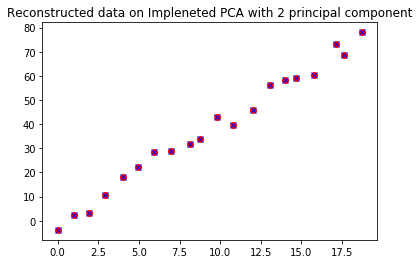

In [116]:
# Reconstruct the data on Implemented PCA
my_data = np.dot(projected_data, derived_pca.components_.T) + np.mean(data, axis=0)

plt.title("Reconstructed data on Impleneted PCA with {} principal component".format(n))
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(my_data[:,0], my_data[:,1], 'bx')

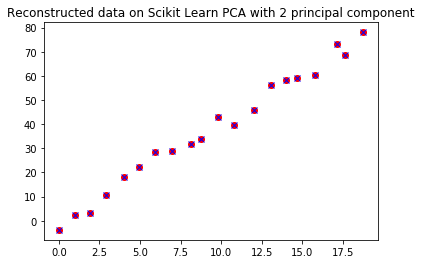

In [117]:
# Reconstruct the data on Scikit Learn PCA
plt.title("Reconstructed data on Scikit Learn PCA with {} principal component".format(n))
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(scikit_pca_result[:,0], scikit_pca_result[:,1], 'bx')

###### Observation when n_component =1:
- The reconstructed data with one eigen vector doesnt excatly match the original data, but its very similar to the original data.

###### Observation when n_component =2:
- The reconstructed data almost match the original data.
